In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from numpy.linalg import inv

### Etape 1 : on defini notre geometrie
cas = 3
%run Cas_Test.ipynb

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)
    
#geom(NL)

Nombre de noeuds : 3
Nombre de elements : 3


In [25]:
### Etapte 2 : On calcule la matrice de raideur dans le repere local dans les coordonnees locales

E = 200e9 # Module D'Young [en Pa]
S = 100e-8 # Section [en m^2]
L = 1 # Longueur d'un element [en m]
q = 20 # Charge repartie (en N/m)

%run Fonctions.ipynb

K_elem = E*S/L*np.array([[1, 0 , -1, 0],
                         [0, 0 , 0, 0],
                        [-1, 0, 1, 0],
                        [0, 0 , 0 , 0]])

def K_elem(L_e) :
    K_elem = E*S/L_e*np.array([[1, 0 , -1, 0],
                         [0, 0 , 0, 0],
                        [-1, 0, 1, 0],
                        [0, 0 , 0 , 0]])
    return K_elem

### Etape 3 : On passe la matrice de raideur dans les coordonnees globale (on fait des rotations)

matrices_de_passage = changement_coord(NL,EL)
for x in matrices_de_passage : 
    print(x)

K_glob = assemblage_2D(K_elem,matrices_de_passage,NL,EL)

BC = np.array([[0. , 0., 0., 0.],
              [0. , 0., 0., 0.],
              [1. , 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 0.,0., 1.]])
F = np.array([0, 0, 0, 0, 4000, 0])
#BC = bc(NoN)
#F = apply_forces_poutre(NoN)

#U = solve(K_glob,F,BC)

K_glob_r = np.transpose(BC).dot(K_glob).dot(BC)
F_r = np.transpose(BC).dot(F)
print("K_glob \n :",K_glob_r)
print("F \n :",F_r)

### Etape 7 : Resolution

U_r = inv(K_glob_r).dot(F_r)
print("Deplacement : \n", U_r)
U = BC.dot(U_r)
print("Deplacement : \n", U)

### Etape 8 : Calcul force reaction

React = K_glob.dot(U) - F
print("Reaction : \n", React)

### Etape 9 : Calcul des contraintes
# On recalcule les déplacements locaux
u = R(0).dot(U[0:4])
#f = K_elem.dot(u)

sigma = stress_barre(u)/1e6
print("Calcul des contraintes (en MPa) : \n",sigma)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
 ### Debut de l'assemblage ###
Global Stiffness : 
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
traitement de l'element :  1
1 2
matrice rotation : 
 [[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0. -0.  1.]]
matrice elementaire apres rotation : 
 [[ 200000.       0. -200000.       0.]
 [      0.       0.       0.       0.]
 [-200000.       0.  200000.       0.]
 [      0.       0.       0.       0.]]
[[ 200000.       0. -200000.       0.       0.       0.]
 [      0.       0.       0.       0.       0.       0.]
 [-200000.       0.  200000.       0.       0.       0.]
 [      0.       0.       0.       0.       0.    

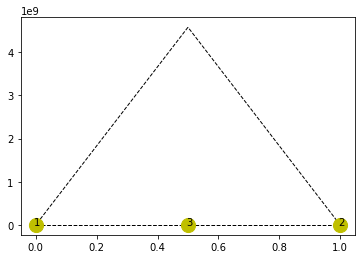

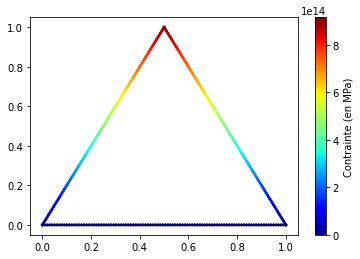

In [22]:
### Etape 10 : Affichage
scale = 100

#plt.scatter(NL[:,0],NL[:,1])
#plt.scatter(NL[:,0]+scale*U[::2].flatten(),NL[:,1]+scale*U[1::2])
    
plot_disp(NL,U)
plot_stress(NL,U)
#norm_x = Normalize(np.abs(color.min()),np.abs(color.max()))